## Ethereum Data Preparation


In [262]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [263]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'FNG Class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['FNG Class'] = fng_df['FNG Class'].map(mapping)
#display(fng_df.dtypes)
fng_df.tail()

,Date,FNG Class
715,2019-02-01,-1.0
716,2019-01-31,-1.0
717,2019-01-30,-1.0
718,2019-01-29,-1.0
719,2019-01-28,-0.5


In [264]:
fng_df.set_index(['Date'], inplace=True)
fng_df.head()

,FNG Class
Date,
2021-01-16,1.0
2021-01-15,1.0
2021-01-14,1.0
2021-01-13,1.0
2021-01-12,1.0


In [265]:
# Load the vader sentiment data for Ethereum
eth_vader_df = pd.read_csv('eth_vader.csv', infer_datetime_format=True, parse_dates=True)
eth_vader_df["Publish Date"] = [date[0:10] for date in eth_vader_df["Publish Date"]]
eth_vader_df = eth_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
eth_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'Vader Compound'}, inplace = True)
# eth_vader_df['Publish Date']=(pd.to_datetime(eth_vader_df['Publish_Date'])) # ,***unit='s'***
#display(eth_vader_df.dtypes)
eth_vader_df.head()

,Score,Date,Vader Compound
0,1,2019-01-24,0.2023
1,1,2019-02-05,0.0000
2,1,2019-02-06,-0.5859
3,1,2019-02-13,0.0000
4,1,2019-02-13,0.0000


In [266]:
eth_vader_df.set_index(['Date'], inplace=True)
eth_vader_df.head()

,Score,Vader Compound
Date,,
2019-01-24,1,0.2023
2019-02-05,1,0.0000
2019-02-06,1,-0.5859
2019-02-13,1,0.0000
2019-02-13,1,0.0000


In [267]:
# Load the historical closing prices for Ethereum
eth_close_df = pd.read_csv('ethprices.csv')
eth_close_df = eth_close_df.sort_index()
eth_close_df = eth_close_df.rename(columns={'date':'Date', 'close':'Close Price'})
eth_close_df = eth_close_df.drop(["symbol", "volume"], axis=1)
#display(eth_close_df.dtypes)
eth_close_df.head()

,Date,Close Price
0,2019-01-28,105.43
1,2019-01-29,104.01
2,2019-01-30,107.50
3,2019-01-31,105.74
4,2019-02-01,105.69


In [268]:
eth_close_df.set_index(['Date'], inplace=True)
eth_close_df.head()

,Close Price
Date,
2019-01-28,105.43
2019-01-29,104.01
2019-01-30,107.50
2019-01-31,105.74
2019-02-01,105.69


In [269]:
# Load the exponential weighted moving average data for Ethereum
eth_ewm_df = pd.read_csv('eth_ema.csv')
eth_ewm_df = eth_ewm_df.sort_index()
#eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df = eth_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'EWM Cross Signal'})
eth_ewm_df = eth_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
#display(eth_ewm_df.dtypes)
eth_ewm_df.head()

,Date,EWM Cross Signal
0,2019-01-28,0.0
1,2019-01-29,-1.0
2,2019-01-30,1.0
3,2019-01-31,1.0
4,2019-02-01,1.0


In [270]:
eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df.head()

,EWM Cross Signal
Date,
2019-01-28,0.0
2019-01-29,-1.0
2019-01-30,1.0
2019-01-31,1.0
2019-02-01,1.0


In [271]:
# Load the money flow index for Ethereum
eth_mfi_df = pd.read_csv('mfi_eth.csv')
eth_mfi_df = eth_mfi_df.sort_index()
eth_mfi_df = eth_mfi_df.rename(columns={'date':'Date'})
eth_mfi_df = eth_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
eth_mfi_df.head()

,Date,MFI
0,2019-02-11,39.154915
1,2019-02-12,49.826727
2,2019-02-13,43.223912
3,2019-02-14,45.434021
4,2019-02-15,53.559606


In [272]:
eth_mfi_df.set_index(['Date'], inplace=True)
eth_mfi_df.head()

,MFI
Date,
2019-02-11,39.154915
2019-02-12,49.826727
2019-02-13,43.223912
2019-02-14,45.434021
2019-02-15,53.559606


In [273]:
# Load the money flow index for Ethereum
eth_google_df = pd.read_csv('eth_google.csv')
eth_google_df = eth_google_df.sort_index()
eth_google_df.head()

,Date,Google Search Count
0,2019-01-28,5
1,2019-01-29,5
2,2019-01-30,5
3,2019-01-31,5
4,2019-02-01,5


In [274]:
eth_google_df.set_index(['Date'], inplace=True)
eth_google_df.head()

,Google Search Count
Date,
2019-01-28,5
2019-01-29,5
2019-01-30,5
2019-01-31,5
2019-02-01,5


In [275]:
# MERGE the closing price, ewm, fng, mfi, and Google DataFrames into a single DataFrame

eth_dfs = [eth_close_df, eth_ewm_df, fng_df, eth_mfi_df, eth_google_df]
eth_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), eth_dfs)
eth_df = eth_data_df.merge(eth_vader_df, on = 'Date', how = 'left')
eth_df.head()

,Close Price,EWM Cross Signal,FNG Class,MFI,Google Search Count,Score,Vader Compound
Date,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.154915,7,NaN,NaN
2019-02-12,121.18,1.0,-0.5,49.826727,7,NaN,NaN
2019-02-13,120.58,1.0,0.0,43.223912,7,1.0,0.0
2019-02-13,120.58,1.0,0.0,43.223912,7,1.0,0.0
2019-02-14,119.37,1.0,0.0,45.434021,7,NaN,NaN


In [276]:
# Load the gas price data for Ethereum
eth_gas_df = pd.read_csv('eth_gas_price.csv')
eth_gas_df = eth_gas_df.sort_index()
eth_gas_df["f0_"] = [date[0:10] for date in eth_gas_df["f0_"]]
eth_gas_df = eth_gas_df.rename(columns={'f0_':'Date'})
eth_gas_df.head()

,Date,f1_
0,2020-05-31,2.412045e+16
1,2019-11-04,1.009714e+16
2,2019-07-19,1.411999e+16
3,2019-09-02,1.206192e+16
4,2019-05-24,1.359907e+16


In [277]:
eth_gas_df.set_index(['Date'], inplace=True)
eth_gas_df.head()

,f1_
Date,
2020-05-31,2.412045e+16
2019-11-04,1.009714e+16
2019-07-19,1.411999e+16
2019-09-02,1.206192e+16
2019-05-24,1.359907e+16


In [278]:
# Load the mining difficulty data for Ethereum
eth_diff_df = pd.read_csv('mining_diff.csv')
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df["f0_"] = [date[0:10] for date in eth_diff_df["f0_"]]
eth_diff_df = eth_diff_df.rename(columns={'f0_':'Date'})
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df.head()

,Date,f1_
0,2019-02-08,11675962921748186482
1,2020-12-07,23435690773987300016
2,2019-01-11,14983853717188636564
3,2020-01-30,13276090712106226622
4,2019-05-15,13118305205057608143


In [279]:
eth_diff_df.set_index(['Date'], inplace=True)
eth_diff_df.head()

,f1_
Date,
2019-02-08,11675962921748186482
2020-12-07,23435690773987300016
2019-01-11,14983853717188636564
2020-01-30,13276090712106226622
2019-05-15,13118305205057608143


In [280]:
# Load the actual ethereum value (transfers) data for Ethereum (volume of transactions by day)
eth_value_df = pd.read_csv('actual_eth_value.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
eth_value_df = eth_value_df.sort_index()
eth_value_df["f0_"] = [date[0:10] for date in eth_value_df["f0_"]]
eth_value_df = eth_value_df.rename(columns={'f0_':'Date'})
eth_value_df.head()

,Date,f1_
0,2019-04-24,3.490000e+24
1,2019-04-03,4.170000e+24
2,2020-08-12,4.200000e+24
3,2020-09-01,6.880000e+24
4,2021-01-17,1.440000e+23


In [281]:
eth_value_df.set_index(['Date'], inplace=True)
eth_value_df.head()

,f1_
Date,
2019-04-24,3.490000e+24
2019-04-03,4.170000e+24
2020-08-12,4.200000e+24
2020-09-01,6.880000e+24
2021-01-17,1.440000e+23


In [282]:
# MERGE the mining data into a single DataFrame
dfs = [eth_diff_df, eth_gas_df, eth_value_df]
eth_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
eth_string_time = "2019-02-08"
eth_datetime = datetime.strptime(eth_string_time, "%Y-%m-%d")
eth_mining_df.rename(columns = {'f0_':'Date', 'f1__x':'Mining Difficulty', 'f1__y': 'Gas Price', 'f1_':'Actual Value' }, inplace = True)
display(eth_mining_df.dtypes)
eth_mining_df.head()

Mining Difficulty     object
Gas Price            float64
Actual Value         float64
dtype: object

,Mining Difficulty,Gas Price,Actual Value
Date,,,
2019-02-08,11675962921748186482,6.269617e+15,2.150000e+24
2020-12-07,23435690773987300016,5.521978e+16,2.750000e+24
2019-01-11,14983853717188636564,7.381782e+15,3.890000e+24
2020-01-30,13276090712106226622,5.117951e+15,1.360000e+24
2019-05-15,13118305205057608143,1.377921e+16,4.390000e+24


In [283]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
eth_master_df.head()

,Close Price,EWM Cross Signal,FNG Class,MFI,Google Search Count,Score,Vader Compound,Mining Difficulty,Gas Price,Actual Value
Date,,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.154915,7,NaN,NaN,11705954410276590164,5.982039e+15,1.910000e+24
2019-02-12,121.18,1.0,-0.5,49.826727,7,NaN,NaN,12158807251676191897,5.694759e+15,1.540000e+24
2019-02-13,120.58,1.0,0.0,43.223912,7,1.0,0.0,11730244995019888264,6.722683e+15,1.810000e+24
2019-02-13,120.58,1.0,0.0,43.223912,7,1.0,0.0,11730244995019888264,6.722683e+15,1.810000e+24
2019-02-14,119.37,1.0,0.0,45.434021,7,NaN,NaN,11514347753303334807,9.071693e+15,1.670000e+24


## Training and Testing for Closing Prices

In [286]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(eth_master_df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(eth_master_df) - window - 1):
        features = eth_master_df.iloc[i:(i + window), feature_col_number]
        target = eth_master_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [287]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'Close' column
# Column index 1 is the `` column
feature_column = 0
target_column = 0
X, y = window_data(eth_df, window_size, feature_column, target_column)

In [288]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [289]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [290]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

## Build and Train the LSTM RNN for Historical Closing Prices

In this section, you will design a custom LSTM RNN and fit (train) it using the training data.

You will need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

### Hints:
You will want to use the same model architecture and random seed for both notebooks. This is necessary to accurately compare the performance of the FNG model vs the closing price model. 

In [291]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [292]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [293]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [294]:
# Summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 10, 30)            3840      
_________________________________________________________________
dropout_18 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 10, 30)            7320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [295]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=100, verbose=1)

Epoch 1/10
6/6 [==============================] - 5s 17ms/step - loss: 0.0042
Epoch 2/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0022
Epoch 3/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 4/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 7/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 8/10
6/6 [==============================] - 0s 14ms/step - loss: 6.5441e-04
Epoch 9/10
6/6 [==============================] - 0s 15ms/step - loss: 5.4934e-04
Epoch 10/10
6/6 [==============================] - 0s 14ms/step - loss: 4.7030e-04


---

## Model Performance

In this section, you will evaluate the model using the test data. 

You will need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [296]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

9/9 [==============================] - 1s 4ms/step - loss: 0.0065


0.00645260326564312

In [297]:
# Make some predictions
predicted = model.predict(X_test)

In [298]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [299]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
Date,,
2020-08-02,372.17,335.466858
2020-08-02,372.17,344.059296
2020-08-02,372.17,352.941650
2020-08-02,372.17,359.326233
2020-08-02,372.17,364.236938


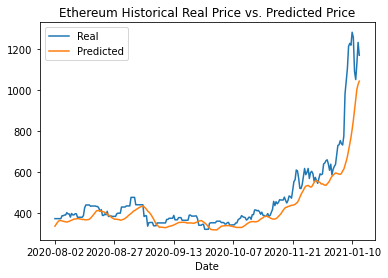

In [300]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Ethereum Historical Real Price vs. Predicted Price")

## Train and Test for Technical Indicators Model

In [301]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
eth_master_df.head()

,Close Price,EWM Cross Signal,FNG Class,MFI,Google Search Count,Score,Vader Compound,Mining Difficulty,Gas Price,Actual Value
Date,,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.154915,7,NaN,NaN,11705954410276590164,5.982039e+15,1.910000e+24
2019-02-12,121.18,1.0,-0.5,49.826727,7,NaN,NaN,12158807251676191897,5.694759e+15,1.540000e+24
2019-02-13,120.58,1.0,0.0,43.223912,7,1.0,0.0,11730244995019888264,6.722683e+15,1.810000e+24
2019-02-13,120.58,1.0,0.0,43.223912,7,1.0,0.0,11730244995019888264,6.722683e+15,1.810000e+24
2019-02-14,119.37,1.0,0.0,45.434021,7,NaN,NaN,11514347753303334807,9.071693e+15,1.670000e+24


In [246]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(eth_master_df, window, feature_col_number, target_col_number):
    X = [#list of lists]
    y = []
    for i in range(len(eth_master_df) - window - 1):
        features = eth_master_df.iloc[i:(i + window), feature_col_number]
        target = eth_master_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [247]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'Close' column
# Column index 1 is the `Close` column
feature_column = 0 
target_column = 0
X, y = window_data(eth_df, window_size, feature_column, target_column)

In [248]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [249]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [250]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Build and Train the LSTM RNN for Technical Indicators

In [252]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [253]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [254]:
# Summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 10, 30)            3840      
_________________________________________________________________
dropout_15 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 30)            7320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [250]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [256]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

9/9 [==============================] - 1s 3ms/step - loss: 0.0056


0.005641849245876074

In [257]:
# Make some predictions
predicted = model.predict(X_test)

In [258]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [259]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
Date,,
2020-08-02,372.17,342.534668
2020-08-02,372.17,351.651978
2020-08-02,372.17,361.238159
2020-08-02,372.17,368.216187
2020-08-02,372.17,373.671448


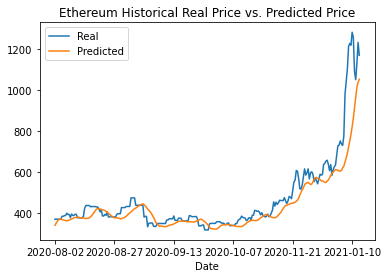

In [260]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Ethereum Historical Real Price vs. Predicted Price")